# Additional Plots to make a point

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import tensorflow as tf
from mlreflect.data_generation import ReflectivityGenerator
from mlreflect.models import DefaultTrainedModel
from mlreflect.training import InputPreprocessor, OutputPreprocessor
from mlreflect.data_generation import Layer, Substrate, AmbientLayer, MultilayerStructure
import pandas as pd

In [3]:
DefaultTrainedModel().q_values.max()


0.14829855470782172

In [4]:
matplotlib.rcParams.update({
    "font.size": 20,
    "boxplot.boxprops.color": "gray",
    "boxplot.patchartist":True,
    "boxplot.showfliers": False,
    "boxplot.notch": True,
    "boxplot.medianprops.color": "firebrick",
    "patch.facecolor": "lightgray"
                         })

In [5]:
train_df=pd.read_csv("train.csv")
y_train=train_df["Value"]
x_train=train_df["Step"]

val_df=pd.read_csv("val.csv")
y_val=val_df["Value"]
x_val=val_df["Step"]

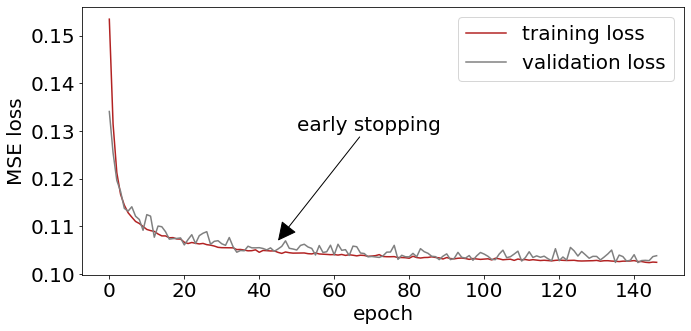

In [12]:
prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0, ec="black", color="black")

fig_early, ax_early=plt.subplots(1, figsize=(10,5))
ax_early.plot(x_train, y_train, label="training loss", color="firebrick")
ax_early.plot(x_val, y_val, label="validation loss", color="gray")
ax_early.legend()
ax_early.set_ylabel("MSE loss")
ax_early.set_xlabel("epoch")
plt.annotate("early stopping", xy=(45, 0.107), xytext=(50, 0.13), arrowprops=prop)
fig_early.tight_layout()
# fig_early.savefig("../fig/early_stopping.pdf")

In [6]:
noise_level=0.3
uniform_noise_range_low=1-noise_level
uniform_noise_range_high=1+noise_level

In [18]:
q_values=DefaultTrainedModel().q_values
substrate = Substrate('Si', 1, 20.0701+0.4571j)
layer1 = Layer('SiOx', 10, 2.5, 17.7735+0.4048j)
layer2 = Layer('Film', (290, 300), (0, 2), (1, 14))
ambient = AmbientLayer('ambient', 0)
sample = MultilayerStructure()
sample.set_substrate(substrate)
sample.set_ambient_layer(ambient)
sample.add_layer(layer1)
sample.add_layer(layer2)

generator = ReflectivityGenerator(q_values, sample)
labels = generator.generate_random_labels(1)
reflectivity = generator.simulate_reflectivity(labels)

100%|██████████| 1/1 [00:00<00:00, 1372.03it/s]


In [8]:
from mlreflect.models import DefaultTrainedModel, TrainedModel
s=DefaultTrainedModel().sample
print(s)

Air (ambient):
	sld: 0 [1e-6 1/Å^2]
[1] Film:
	thickness: (20, 1000) [Å]
	roughness: (0, 100) [Å]
	sld: (1, 14) [1e-6 1/Å^2]
[0] SiOx:
	thickness: 10.0 [Å]
	roughness: 2.5 [Å]
	sld: (17.7735+0.4048j) [1e-6 1/Å^2]
Si (substrate):
	roughness: 1 [Å]
	sld: (20.0701+0.4571j) [1e-6 1/Å^2]


In [19]:
# refl=np.loadtxt("/home/maximilian/Dropbox/Studium/bachelor_thesis/bachelor_thesis_cnn/src/data/debug/reflectivity_real_scale.csv")[:100]
refl=reflectivity
noisy = refl*tf.random.uniform(
                    shape=refl.shape, minval=uniform_noise_range_low, maxval=uniform_noise_range_high).numpy()


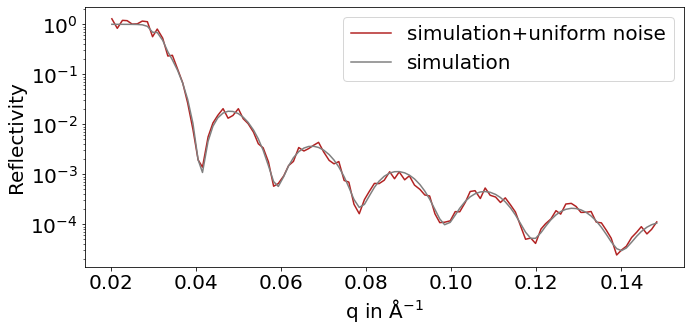

In [36]:
x=q_values
y=noisy[0]
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
ax.semilogy(x, y, color="firebrick", label="simulation+uniform noise")
ax.semilogy(x, refl[0], color="gray", label="simulation")
#plt.annotate("early stopping", xy=(0.03, 1), xytext=(50, 0.13), arrowprops=prop)
ax.set_xlabel("q in $\mathrm{\AA^{-1}}$")
ax.set_ylabel("Reflectivity")
fig.tight_layout()
ax.legend()
# fig.savefig("../fig/training_curve_noisy.pdf")

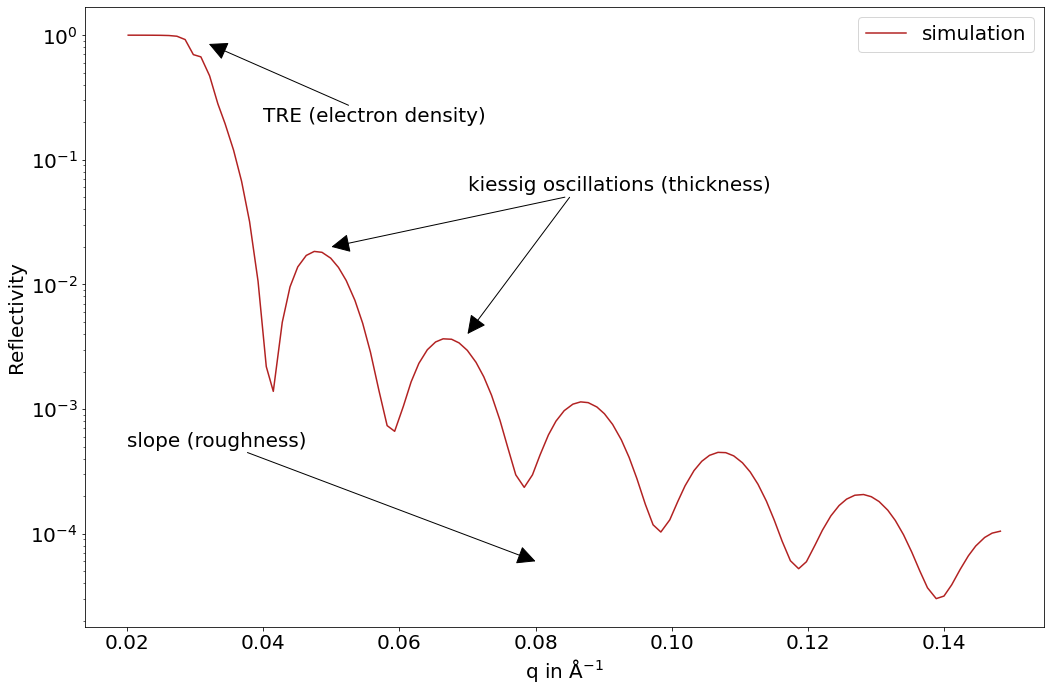

In [20]:
x=q_values
y=noisy[0]
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
#ax.semilogy(x, y, color="firebrick", label="simulation+uniform noise")
ax.semilogy(x, refl[0], color="firebrick", label="simulation")
plt.annotate("TRE (electron density)", xy=(0.032, 0.85), xytext=(0.04, 0.2), arrowprops=prop)
plt.annotate("kiessig oscillations (thickness)", xy=(0.05, 0.02), xytext=(0.07, 0.056), arrowprops=prop)
plt.annotate("", xy=(0.07, 0.004), xytext=(0.085, 0.05), arrowprops=prop)
plt.annotate("slope (roughness)", xy=(0.08, 0.00006), xytext=(0.02, 0.0005), arrowprops=prop)
ax.set_xlabel("q in $\mathrm{\AA^{-1}}$")
ax.set_ylabel("Reflectivity")
ax.legend()
fig.tight_layout()
fig.savefig("../fig/curve_features.pdf")